#**Defining the Question:**

## a) Specifying the Question



> Is the number of bluecars taken over the weekend different from the bluecars taken over the weekday?





##b) Defining the Metric for Success



> Results showing whether the number of bluecars taken over the weekend is different from those taken over the weekday






#c) Understanding the context


> A dataset from the autolib car hiring company showing the number of bluecars hired and returned per day of the week and postal code is to be analyzed



# **Load and Clean Data**

In [125]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
% matplotlib inline 
import seaborn as sns

In [126]:
# import the dataset
autolib = pd.read_csv('/content/Week_4_IP_autolib_daily_events_postal_code (1).csv', parse_dates=True)

# Preview the head
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [127]:
# preview the tail
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [128]:
# drop unnecessary columns. Since we are interested in the bluecars, columns relating to the utilib are dropped

autolib.drop(['Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum'], axis=1, inplace=True)
autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,0,0


In [129]:
autolib.shape  # check on the shape

(16085, 9)

In [130]:
# fix messy column names by standardizing the format of the column names

autolib.columns = autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


autolib.rename(columns={'dayofweek':'day_of_week'}, inplace=True) # Rename the dayOfWeek column name

autolib.head(0)


,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum


In [131]:
# count the number of non - missing values in the df dataframe
#
autolib.count()

# seems that the all the rows in the dataset don't have any missing values

postal_code              16085
date                     16085
n_daily_data_points      16085
day_of_week              16085
day_type                 16085
bluecars_taken_sum       16085
bluecars_returned_sum    16085
slots_freed_sum          16085
slots_taken_sum          16085
dtype: int64

In [132]:
autolib.dtypes # check on the respective column data types

postal_code               int64
date                     object
n_daily_data_points       int64
day_of_week               int64
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
slots_freed_sum           int64
slots_taken_sum           int64
dtype: object

In [133]:
autolib['date'] = pd.to_datetime(autolib['date']) # change date column from object to date

autolib.dtypes # Check that the datatype has been effected

postal_code                       int64
date                     datetime64[ns]
n_daily_data_points               int64
day_of_week                       int64
day_type                         object
bluecars_taken_sum                int64
bluecars_returned_sum             int64
slots_freed_sum                   int64
slots_taken_sum                   int64
dtype: object

In [134]:
autolib = autolib.set_index('date') # Convert the date column to the index column

# Convert the day of the week column (shown as a number) into the name of the day in a new column called "day_name"
autolib['day_name'] = autolib.index.day_name()

# check success
autolib.head()

,postal_code,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,day_name
date,,,,,,,,,
2018-01-01,75001,1440,0,weekday,110,103,22,20,Monday
2018-01-02,75001,1438,1,weekday,98,94,23,22,Tuesday
2018-01-03,75001,1439,2,weekday,138,139,27,27,Wednesday
2018-01-04,75001,1320,3,weekday,104,104,25,21,Thursday
2018-01-05,75001,1440,4,weekday,114,117,18,20,Friday


In [135]:
# Identify duplicate data and drop it

autolib = autolib.drop_duplicates()

# check the shape of the data to see if there were any duplicates
autolib.shape

# The dataset has dropped 213 (16,085 - 15,872) duplicated data

(15872, 9)

# **Univariate Analysis**

## a) Outliers

Text(0, 0.5, 'Day of the Week')

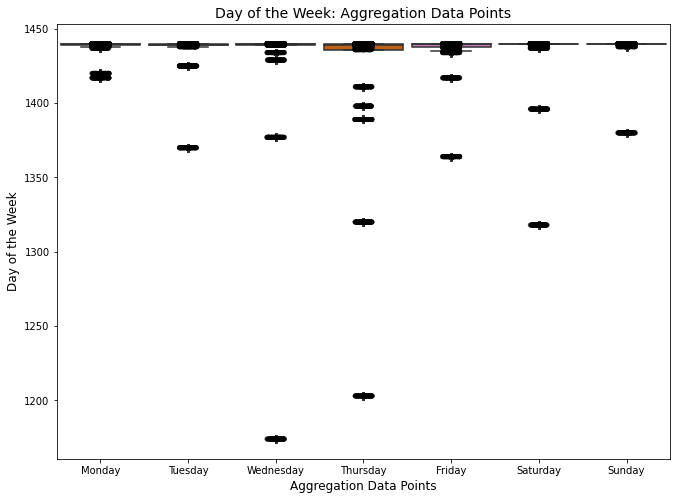

In [136]:
# Check for outliers in the data points column

fig_dimensions = (11,8) # Set the dimensions of the plot

# plot the boxplot

fig, ax = plt.subplots(figsize=fig_dimensions)

bplot = sns.boxplot(y='n_daily_data_points', x='day_name', data=autolib, width=0.9, palette="colorblind", order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# overlay the data points on the boxplot and plot the boxplot with data points using stripplot

bplot=sns.stripplot(y='n_daily_data_points', x='day_name',  data=autolib, jitter=True, marker='o', alpha=0.5, color='black')

# Give the graph the header and axis names

bplot.axes.set_title("Day of the Week: Aggregation Data Points", fontsize=14)
bplot.set_xlabel("Aggregation Data Points", fontsize=12)
bplot.set_ylabel("Day of the Week", fontsize=12)

Seems that there are a number of outliers, with Wednesday having the largest outliers. Outliers increase from Monday to Wednesday then reduce to Monday. We will however not remove the outliers because this only indicates that fewer data points were available to collect the data. It would however necessitate further investigation as to why the reduction in the data points.

Text(0, 0.5, 'Day of the Week')

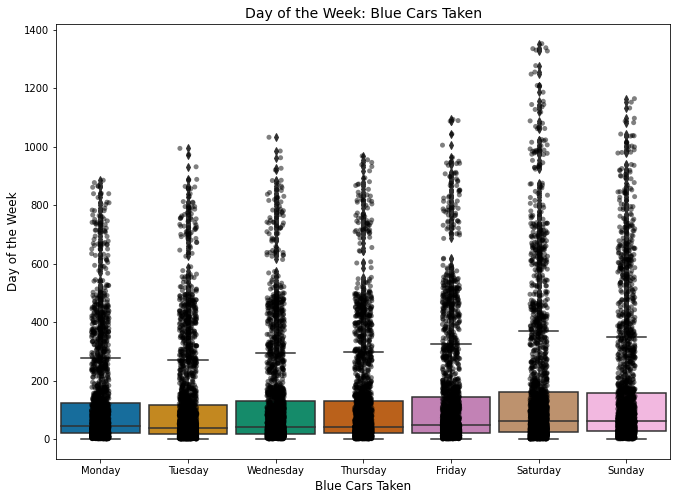

In [137]:
# check for outliers in the blue cars taken

fig_dimensions = (11,8) # Set the dimensions of the plot

# plot the boxplot

fig, ax = plt.subplots(figsize=fig_dimensions)

bplot = sns.boxplot(y='bluecars_taken_sum', x='day_name', data=autolib, width=0.9, palette="colorblind", order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# overlay the data points on the boxplot and plot the boxplot with data points using stripplot

bplot=sns.stripplot(y='bluecars_taken_sum', x='day_name',  data=autolib, jitter=True, marker='o', alpha=0.5, color='black')

# Give the graph the header and axis names

bplot.axes.set_title("Day of the Week: Blue Cars Taken", fontsize=14)
bplot.set_xlabel("Blue Cars Taken", fontsize=12)
bplot.set_ylabel("Day of the Week", fontsize=12)

Outliers grow as we move towards Saturday, with a dip in Thursday, signifying that bluecars are hired more as the week progresses towards the weekend

Text(0, 0.5, 'Day of the Week')

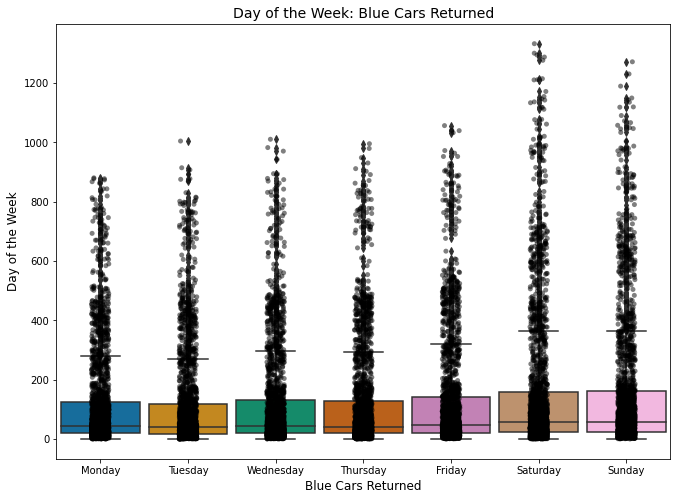

In [138]:
# check for outliers in the blue cars returned

fig_dimensions = (11,8) # Set the dimensions of the plot

# plot the boxplot

fig, ax = plt.subplots(figsize=fig_dimensions)

bplot = sns.boxplot(y='bluecars_returned_sum', x='day_name', data=autolib, width=0.9, palette="colorblind", order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# overlay the data points on the boxplot and plot the boxplot with data points using stripplot

bplot=sns.stripplot(y='bluecars_returned_sum', x='day_name',  data=autolib, jitter=True, marker='o', alpha=0.5, color='black')

# Give the graph the header and axis names

bplot.axes.set_title("Day of the Week: Blue Cars Returned", fontsize=14)
bplot.set_xlabel("Blue Cars Returned", fontsize=12)
bplot.set_ylabel("Day of the Week", fontsize=12)

The number of bluecars returned also increased as the week progresses towards the weekend (and the number of bluecars returned is almost similar to bluecars rented out) signifying that most bluecars rentals are for a day

Text(0, 0.5, 'Day of the Week')

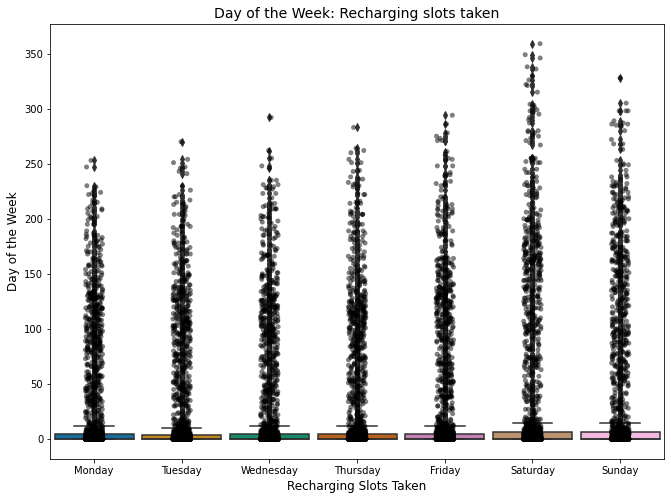

In [139]:
# check for outliers in the recharging slots taken in each day of the week

fig_dimensions = (11,8) # Set the dimensions of the plot

# plot the boxplot

fig, ax = plt.subplots(figsize=fig_dimensions)

bplot = sns.boxplot(y='slots_taken_sum', x='day_name', data=autolib, width=0.9, palette="colorblind", order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# overlay the data points on the boxplot and plot the boxplot with data points using stripplot

bplot=sns.stripplot(y='slots_taken_sum', x='day_name',  data=autolib, jitter=True, marker='o', alpha=0.5, color='black')

# Give the graph the header and axis names

bplot.axes.set_title("Day of the Week: Recharging slots taken", fontsize=14)
bplot.set_xlabel("Recharging Slots Taken", fontsize=12)
bplot.set_ylabel("Day of the Week", fontsize=12)

Text(0, 0.5, 'Day of the Week')

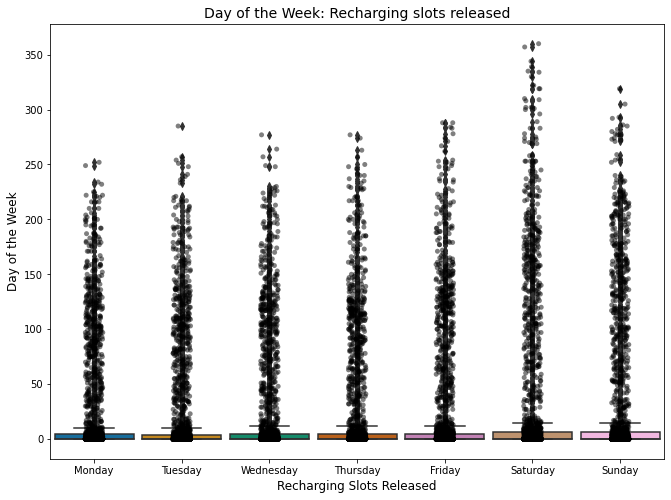

In [140]:
# check for outliers in the recharging slots released in each day of the week

fig_dimensions = (11,8) # Set the dimensions of the plot

# plot the boxplot

fig, ax = plt.subplots(figsize=fig_dimensions)

bplot = sns.boxplot(y='slots_freed_sum', x='day_name', data=autolib, width=0.9, palette="colorblind", order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# overlay the data points on the boxplot and plot the boxplot with data points using stripplot

bplot=sns.stripplot(y='slots_freed_sum', x='day_name',  data=autolib, jitter=True, marker='o', alpha=0.5, color='black')

# Give the graph the header and axis names

bplot.axes.set_title("Day of the Week: Recharging slots released", fontsize=14)
bplot.set_xlabel("Recharging Slots Released", fontsize=12)
bplot.set_ylabel("Day of the Week", fontsize=12)

The outliers seem to grow in magnitude from Monday to Saturday. Thereafter, they drop on Sunday and Monday

## b) Measures of Central Tendency

Round the measures of central tendency to a whole number since the data we are dealing with i.e. cars and charging slots, makes sense when analyzed as a whole number

In [141]:
# Check the mean of the dataset
print('The mean number of bluecars taken is: ', round(autolib['bluecars_taken_sum'].mean(),0))
print('The mean number of bluecars returned is: ', round(autolib['bluecars_returned_sum'].mean(),0))
print('The mean number of charging slots released: ', round(autolib['slots_freed_sum'].mean(),0))
print('The mean number of charging slots taken: ', round(autolib['slots_taken_sum'].mean(),0))

The mean number of bluecars taken is:  127.0
The mean number of bluecars returned is:  127.0
The mean number of charging slots released:  23.0
The mean number of charging slots taken:  23.0


This is the average of the dataset. The mean of the bluecars (whether the returned label or the taken label) is similar. So is the mean of the charging slots.

In [142]:
# Check the median of the dataset
print('The median number of bluecars taken is: ', round(autolib['bluecars_taken_sum'].median(),0))
print('The median number of bluecars returned is: ', round(autolib['bluecars_returned_sum'].median(),0))
print('The median number of charging slots released: ', round(autolib['slots_freed_sum'].median(),0))
print('The median number of charging slots taken: ', round(autolib['slots_taken_sum'].median(),0))

The median number of bluecars taken is:  47.0
The median number of bluecars returned is:  47.0
The median number of charging slots released:  0.0
The median number of charging slots taken:  0.0


The median is the middle number in the dataset

In [143]:
# Check the mode of the dataset
print('The mode of bluecars taken is: ', round(autolib['bluecars_taken_sum'].mode(),0))
print('The mode of bluecars returned is: ', round(autolib['bluecars_returned_sum'].mode(),0))
print('The mode of charging slots released: ', round(autolib['slots_freed_sum'].mode(),0))
print('The mode of charging slots taken: ', round(autolib['slots_taken_sum'].mode(),0))

The mode of bluecars taken is:  0    12
dtype: int64
The mode of bluecars returned is:  0    13
dtype: int64
The mode of charging slots released:  0    0
dtype: int64
The mode of charging slots taken:  0    0
dtype: int64


Shows the most occuring numbers, for the bluecars being 0 and 12(or 13) and for the charging slots being 0

## c) Measures of dispersion

In [144]:
# Check the standard deviation of the dataset

print('The standard deviation of bluecars taken is: ', autolib['bluecars_taken_sum'].std())
print('The standard deviation of bluecars returned is: ', autolib['bluecars_returned_sum'].std())
print('The standard deviation of charging slots released: ', autolib['slots_freed_sum'].std())
print('The standard deviation of charging slots taken: ', autolib['slots_taken_sum'].std())

The standard deviation of bluecars taken is:  186.2260807978868
The standard deviation of bluecars returned is:  186.30337443749949
The standard deviation of charging slots released:  52.4027532523581
The standard deviation of charging slots taken:  52.428723352900015


In [145]:
# Check the skew of the dataset

print('The skew of bluecars taken is: ', autolib['bluecars_taken_sum'].skew())
print('The skew of bluecars returned is: ', autolib['bluecars_returned_sum'].skew())
print('The skew of charging slots released: ', autolib['slots_freed_sum'].skew())
print('The skew of charging slots taken: ', autolib['slots_taken_sum'].skew())

The skew of bluecars taken is:  2.386882654790059
The skew of bluecars returned is:  2.392589722043098
The skew of charging slots released:  2.5736574748960406
The skew of charging slots taken:  2.5731548507318855


Skew is the measure of assymentry in the dataset. Our dataset has positive skews showing that the tail on the right side of the curve is bigger than on the left side, thus our datapoints are more concentrated towards the lower numbers of the range in each label.

In [146]:
# Check the kurtosis of the dataset

print('The skew of bluecars taken is: ', autolib['bluecars_taken_sum'].kurt())
print('The skew of bluecars returned is: ', autolib['bluecars_returned_sum'].kurt())
print('The skew of charging slots released: ', autolib['slots_freed_sum'].kurt())
print('The skew of charging slots taken: ', autolib['slots_taken_sum'].kurt())

The skew of bluecars taken is:  6.060739290599625
The skew of bluecars returned is:  6.073955633185672
The skew of charging slots released:  6.316308579110861
The skew of charging slots taken:  6.304441830333567


Kurtosis shows whether our data has outliers. In this case, kurtosis is greater than +6 for all the data labels. This shows that our data has a heavy presence of outliers

# **Bivariate Analysis**

In [147]:
autolib.head(1)

,postal_code,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,day_name
date,,,,,,,,,
2018-01-01,75001,1440,0,weekday,110,103,22,20,Monday


In [148]:
# drop categorical data from our dataframe so as to enable bivariate analysis

autolib_non_categorical = autolib.drop(['day_type','day_name'], axis=1)
autolib_non_categorical

,postal_code,n_daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,
2018-01-01,75001,1440,0,110,103,22,20
2018-01-02,75001,1438,1,98,94,23,22
2018-01-03,75001,1439,2,138,139,27,27
2018-01-04,75001,1320,3,104,104,25,21
2018-01-05,75001,1440,4,114,117,18,20
...,...,...,...,...,...,...,...
2018-06-15,95880,1440,4,15,10,0,0
2018-06-16,95880,1440,5,19,19,0,0
2018-06-17,95880,1440,6,33,35,0,0


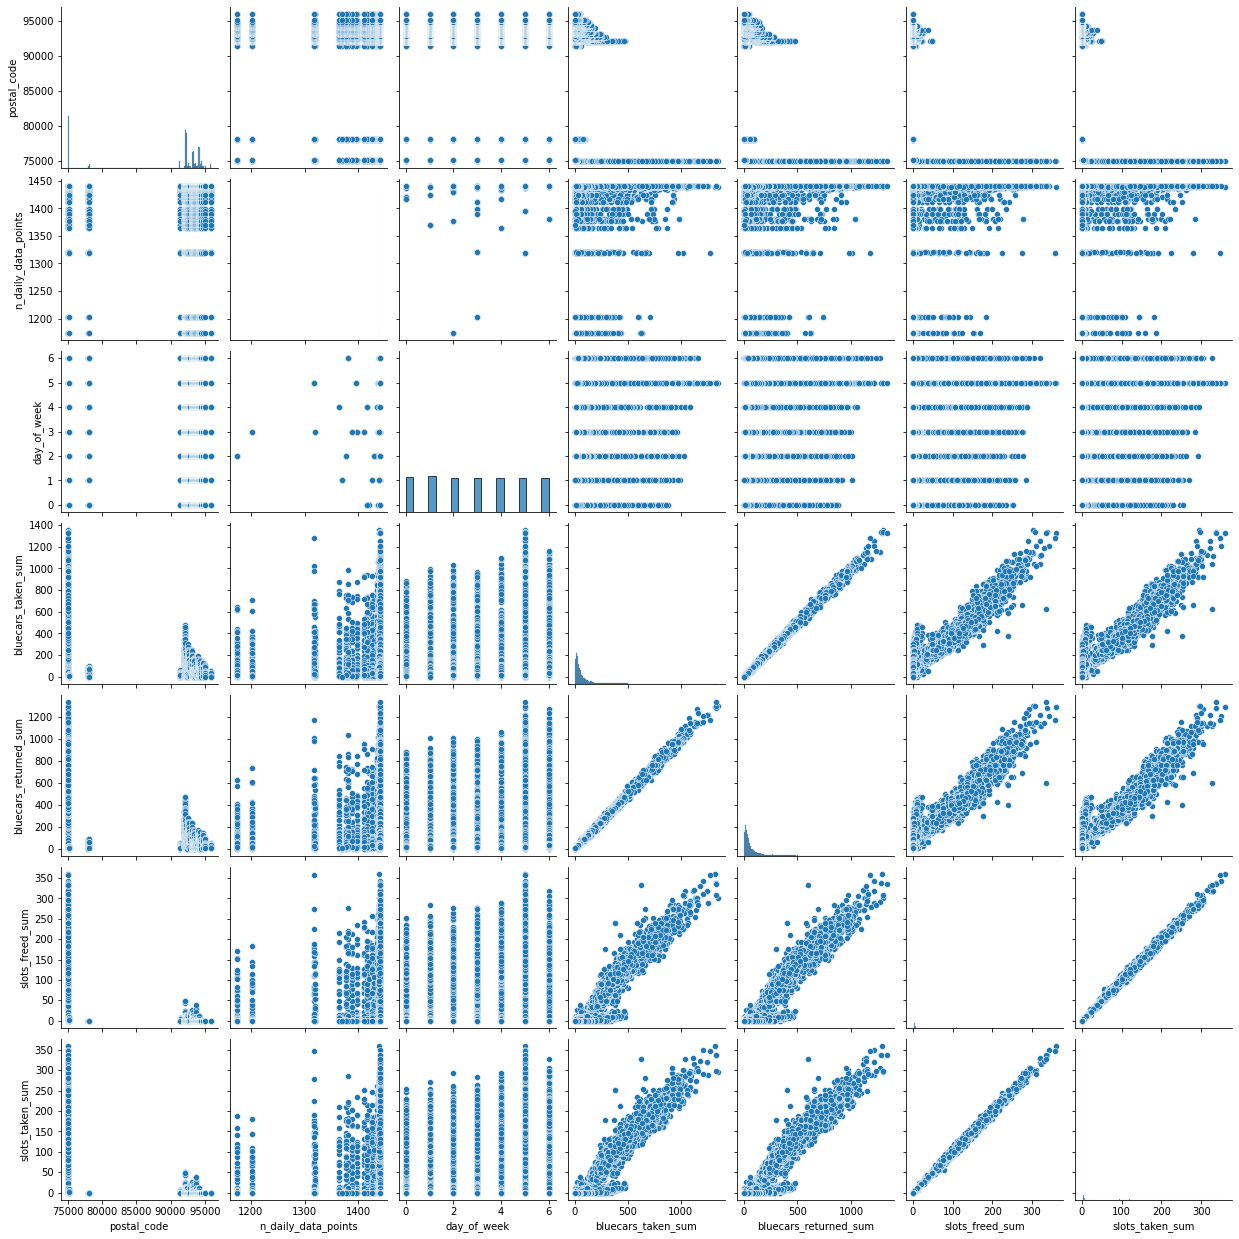

In [149]:
sns.pairplot(autolib_non_categorical)
plt.show()

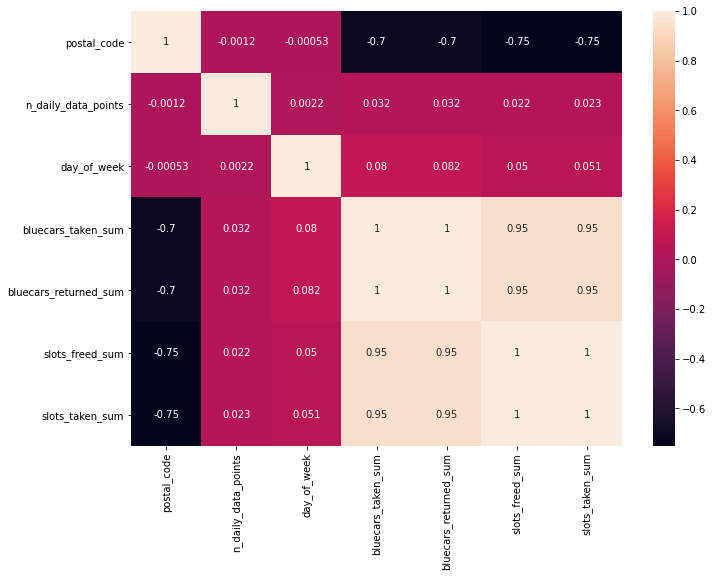

In [150]:
fig_dimensions = (11,8) # Set the dimensions of the plot

# plot the boxplot

fig, ax = plt.subplots(figsize=fig_dimensions)

sns.heatmap(autolib_non_categorical.corr(),annot=True)
plt.show()

The pairplot and correlation matrix above all state the same thing. The most correlated data columns with a correlation of 1 (showing that there is a perfect positive correlation) are:

> a) Blue cars returned and bluecars taken: showing that there is high demand for the bluecars.

> b) Slots taken and slots freed: this would indicate that as the bluecars are returned, their electric batteries need to be charged. It seems as if once the bluecar is charged, it is taken up for hire with another returned bluecar taking up its charging slot, hence the perfect positive correlation.

Thereafter, the following have a correlation of 0.95:

> a) Slots freed and blue cars taken: Shoeing that slots are freed as bluecars as taken, which makes sense

> b) slots freed and blue cars returned: Showing that slots are freed as bluecars are returned. To understand this, it is imperative to understand that the bluecars taken are perfectly positively correlated with the bluecars returned.

> c) bluecars taken and slots taken

> d) bluecars returned and slots taken

These same data labels are the ones exhibiting a clear linear pattern with the increasing 45 degree slope in the scatter plots above.

Thereafter we have some weak positively correlated columns. A point of note however that the postal code has a negative correlation with all the other data labels. There is a strong negative correlation (greater than -0.7) of postal code and the following data labels: bluecars taken, bluecars returned, slots freed, slots taken,





# **Stratified Sampling**

## Hypothesis statement: 

> Null Hypothesis: The mean number of bluecars taken over the weekend is the same as the mean number of bluecars taken over the weekday

> Alternative Hypothesis: The mean number of bluecars taken over the weekend is greater than the mean number of bluecars taken over the weekday






## Deriving the Sample: 

In [151]:
# preview the datset
autolib.head(3)

,postal_code,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum,day_name
date,,,,,,,,,
2018-01-01,75001,1440,0,weekday,110,103,22,20,Monday
2018-01-02,75001,1438,1,weekday,98,94,23,22,Tuesday
2018-01-03,75001,1439,2,weekday,138,139,27,27,Wednesday


In [152]:
# since our hypothesis test is only concerned with whether the number of bluecars taken over the weekend is
# different from the bluecars taken over the weekday, we will drop the unnecessary columns

bluecars =autolib.drop(['postal_code','n_daily_data_points','day_of_week','bluecars_returned_sum','slots_freed_sum','slots_taken_sum'], axis=1)

#preview our new dataset
bluecars.head(3)

,day_type,bluecars_taken_sum,day_name
date,,,
2018-01-01,weekday,110,Monday
2018-01-02,weekday,98,Tuesday
2018-01-03,weekday,138,Wednesday


In [153]:
# confirm the proprtion of bluecars hired in each day of the week

((bluecars['day_name'].value_counts())/len(bluecars))*100

Tuesday      14.749244
Monday       14.642137
Friday       14.207409
Thursday     14.169607
Sunday       14.106603
Wednesday    14.094002
Saturday     14.030998
Name: day_name, dtype: float64

In [154]:
# create a stratified random sample from the bluecars dataframe

# To create a stratified random sample we'll use pandas groupBy method. Basically what the method does is that it splits our 
# dataset into sets and then applies a function on each subset.
# In our case, we are going to applies a function that puts each subset into a random sample with a size of 100. 
# The beauty about this method is that it strictly maintains the populations proportion.

# Stratified sample
bluecars_stratified = bluecars.groupby(['day_name'], group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print((bluecars_stratified['day_name'].value_counts()/len(bluecars_stratified))*100)

# Check the stratified output
print(bluecars_stratified)

Tuesday      14.735516
Monday       14.609572
Friday       14.231738
Thursday     14.168766
Wednesday    14.105793
Sunday       14.105793
Saturday     14.042821
Name: day_name, dtype: float64
           day_type  bluecars_taken_sum   day_name
date                                              
2018-04-27  weekday                  51     Friday
2018-04-20  weekday                  42     Friday
2018-03-02  weekday                  85     Friday
2018-02-16  weekday                  11     Friday
2018-01-05  weekday                  20     Friday
...             ...                 ...        ...
2018-01-17  weekday                 430  Wednesday
2018-04-18  weekday                  16  Wednesday
2018-01-17  weekday                  11  Wednesday
2018-05-23  weekday                  21  Wednesday
2018-02-28  weekday                  58  Wednesday

[1588 rows x 3 columns]


We are now working with 1,588 rows and 3 columns down from 15,872 rows and 9 columns

# **Statistical Distribution: The t-distribution**

> Since we are interested in comparing the means of two samples, we use the t-test to tell if the two means are statistically different from each other

> The test will use a p-value of 0.05 (or 5%)

> The t- statistic is calculated as: The difference between sample means / standard error of the difference between the means


In [155]:
# import the necessary libraries to enable us compute the t-statistic
from scipy import stats
from math import sqrt
from scipy.stats import ttest_ind
from scipy.stats import t

In [156]:
bluecars_stratified.head(1) # check the dataset

,day_type,bluecars_taken_sum,day_name
date,,,
2018-04-27,weekday,51,Friday


In [157]:
bluecars_stratified.dtypes # check the datatypes

day_type              object
bluecars_taken_sum     int64
day_name              object
dtype: object

In [158]:
# separate the bluecars_stratified dataframe into two dataframes to enable the calculation of standard deviations and means
# create a bluecars_weekday dataframe
bluecars_weekday = bluecars_stratified[bluecars_stratified.day_type == 'weekday']
bluecars_weekday.shape

(1141, 3)

In [159]:
# create a bluecars_weekend dataframe
bluecars_weekend = bluecars_stratified[bluecars_stratified.day_type == 'weekend']
bluecars_weekend.shape

(447, 3)

In [160]:
# calculate the means

# a) of the bluecars_weekday stratified dataframe

weekday_mean = bluecars_weekday['bluecars_taken_sum'].mean()

print('The mean of the weekday bluecars rented out data sample is: ', weekday_mean)

# b) of the bluecars_weekend stratified dataframe

weekend_mean = bluecars_weekend['bluecars_taken_sum'].mean()

print('The mean of the weekend bluecars rented out data sample is: ', weekend_mean)


The mean of the weekday bluecars rented out data sample is:  125.20245398773007
The mean of the weekend bluecars rented out data sample is:  146.1118568232662


In [161]:
# calculate the standard deviation:

# a) of the bluecars_weekday stratified dataframe

weekday_std = bluecars_weekday['bluecars_taken_sum'].std()

print('The standard deviation of the weekday bluecars rented out data sample is: ', weekday_std)

# b) of the bluecars_weekend stratified dataframe

weekend_std = bluecars_weekend['bluecars_taken_sum'].std()

print('The standard deviation of the weekend bluecars rented out data sample is: ', weekend_std)

The standard deviation of the weekday bluecars rented out data sample is:  175.215912502183
The standard deviation of the weekend bluecars rented out data sample is:  216.31055572554322


In [162]:
# calculate the standard error (se = std / sqrt(n)):

# a) of the bluecars_weekday stratified dataframe

weekday_std_error = weekday_std/ len(bluecars_weekday)

print('The standard error of the weekday bluecars rented out data sample is: ', weekday_std_error)

# b) of the bluecars_weekend stratified dataframe

weekend_std_error = weekend_std/ len(bluecars_weekend)

print('The standard error of the weekday bluecars rented out data sample is: ', weekend_std_error)

The standard error of the weekday bluecars rented out data sample is:  0.15356346406852145
The standard error of the weekday bluecars rented out data sample is:  0.4839162320481951


In [163]:
# Calculate the standard error of the difference between the means:
standard_error_of_difference = sqrt((weekday_std_error**2) + (weekend_std_error**2))

standard_error_of_difference

0.5076974070609842

In [164]:
# calculate the t statistic

t_statistic = (weekday_mean - weekend_mean)/standard_error_of_difference

t_statistic

-41.18477373477017

In [165]:
# calculate the degrees of freedom

degrees_of_freedom = len(bluecars_weekday) + len(bluecars_weekend) - 2

degrees_of_freedom

1586

In [166]:
# calculate the critical value

alpha = 0.05 # This had been mentioned earlier

critical_value = t.ppf(1.0 - alpha, degrees_of_freedom)

critical_value

1.6458149541902078

In [167]:
# calculate the p-value
p = (1.0 - t.cdf(abs(t_statistic), degrees_of_freedom)) * 2.0

p

0.0

In [168]:
# Interpreting our analysis above through the critical value

if abs(t_statistic) <= critical_value:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [169]:
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


## Conclusion: We reject the null hypothesis and accept the alternative hypothesis that the means are not equal.